#Libraries

In [1]:
import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from imutils import paths
from tensorflow import keras
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.nn import softmax 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import cv2
from skimage.metrics import structural_similarity as ssim


2024-10-31 11:33:59.453079: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-31 11:34:03.085714: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-31 11:34:03.086786: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-10-31 11:34:03.107728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-31 11:34:03.107920: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P2000 computeCapability: 6.1
coreClock: 1.607GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 89.53GiB/s
2024-10-31 11:34:03.107947: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-10-31 11:34:03.160603: I tensorflow/stream_executor/platform/default/dso_loa

In [3]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/home/gunner/Dataset/FR0"))

data = []
data_cropped = []
labels = []
label = 0
counter_0 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  labels.append(label)
  counter_0 += 1
print(f'Loaded FR0... {counter_0} files has loaded.')

2024-10-31 11:34:03.392899: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 11:34:03.394801: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-31 11:34:03.395109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-31 11:34:03.395268: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P2000 computeCapability: 6.1
coreClock: 1.607GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 89.53GiB/s
2024-10-

Loaded FR0... 6066 files has loaded.


In [4]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/home/gunner/Dataset/FRI"))


label = 1
counter_1 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  labels.append(label)
  counter_1 += 1
print(f'Loaded FRI... {counter_1} files has loaded.')

Loaded FRI... 5008 files has loaded.


In [5]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/home/gunner/Dataset/FRII"))

label = 2
counter_2 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  labels.append(label)
  counter_2 += 1
print(f'Loaded FRII... {counter_2} files has loaded.')

Loaded FRII... 2066 files has loaded.


#**Cropping**

In [6]:
data_cropped = []
for image in data:
  image = tf.image.crop_to_bounding_box(image, 120, 120, 60, 60)
  data_cropped.append(image)


#**EDA**

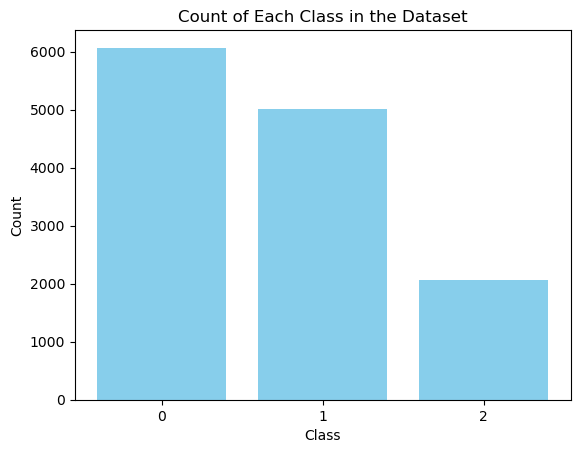

In [7]:
counter = Counter(labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [8]:
labels = np.array(labels,dtype='uint8')
data = np.array(data,dtype='uint8')
data_cropped = np.array(data_cropped,dtype='uint8')

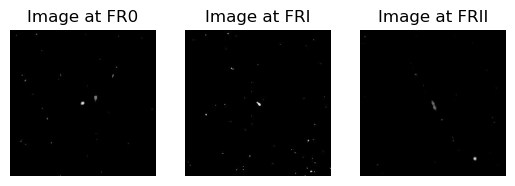

In [9]:
class_0 = data[labels == 0]
image = np.squeeze(class_0[1])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

class_1 = data[labels == 1]
image = np.squeeze(class_1[1])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

class_2 = data[labels == 2]
image = np.squeeze(class_2[1])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

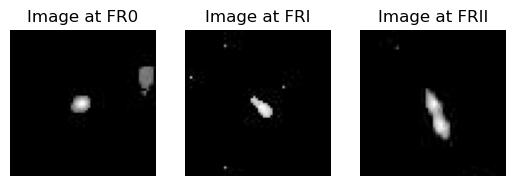

In [10]:
class_0 = data_cropped[labels == 0]
image = np.squeeze(class_0[1])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

class_1 = data_cropped[labels == 1]
image = np.squeeze(class_1[1])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

class_2 = data_cropped[labels == 2]
image = np.squeeze(class_2[1])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

#**Filterring**

In [11]:
data_cropped.shape, labels.shape

((13140, 60, 60, 1), (13140,))

In [12]:
mask = np.array([np.max(image) >= 5 for image in data_cropped])
filtered_data = data_cropped[mask]
filtered_labels = labels[mask]

In [13]:
mask_useless = np.array([np.max(image) < 5 for image in data_cropped])
useless_data = data_cropped[mask_useless]
useless_labels = labels[mask_useless]

In [14]:
class_0_useless = useless_data[useless_labels == 0]
class_1_useless = useless_data[useless_labels == 1]
class_2_useless = useless_data[useless_labels == 2]

In [15]:
np.max(class_0_useless), np.max(class_1_useless), np.max(class_2_useless)

(2, 0, 2)

In [16]:
class_0_useless.shape, class_1_useless.shape, class_2_useless.shape

((94, 60, 60, 1), (40, 60, 60, 1), (36, 60, 60, 1))

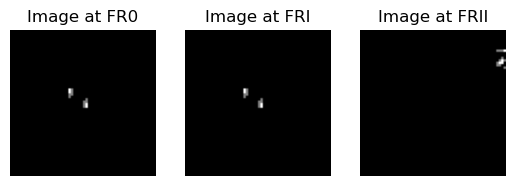

In [17]:
temp = 0
for i in class_0_useless:
  if np.max(i) >temp:
    temp = np.max(i)
    image = np.squeeze(i)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

temp = 0
for i in class_1_useless:
  if np.max(i) >temp:
    temp = np.max(i)
    image = np.squeeze(i)
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

temp = 0
for i in class_2_useless:
  if np.max(i) >temp:
    temp = np.max(i)
    image = np.squeeze(i)
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

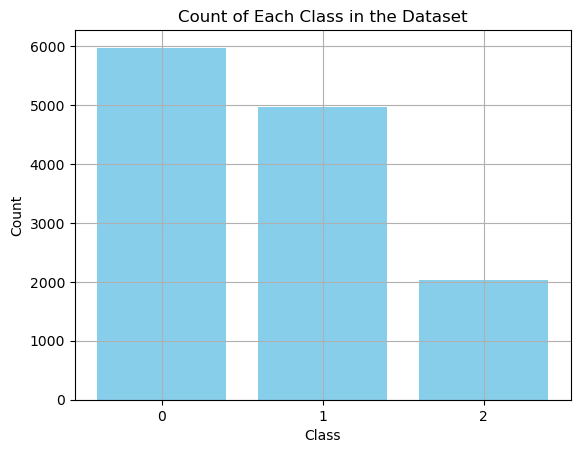

In [18]:
counter = Counter(filtered_labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.grid(True)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [19]:
class_0_image = filtered_data[filtered_labels == 0]
class_1_image = filtered_data[filtered_labels == 1]
class_2_image = filtered_data[filtered_labels == 2]
class_0_image.shape, class_1_image.shape, class_2_image.shape

((5972, 60, 60, 1), (4968, 60, 60, 1), (2030, 60, 60, 1))

#**Augmentation**

In [20]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
class_2_data = filtered_data[filtered_labels == 2]
class_1_data = filtered_data[filtered_labels == 1]


augmented_class_2_data = []
augmented_class_2_labels = []

for i in range(4000):
    image = class_2_data[np.random.randint(0, len(class_2_data))]
    augmented_image = datagen.random_transform(image)
    augmented_class_2_data.append(augmented_image)
    augmented_class_2_labels.append(2)



augmented_class_1_data = []
augmented_class_1_labels = []

for i in range(1000):
    image = class_1_data[np.random.randint(0, len(class_1_data))]
    augmented_image = datagen.random_transform(image)
    augmented_class_1_data.append(augmented_image)
    augmented_class_1_labels.append(1)



In [21]:
augmented_class_2_data = np.array(augmented_class_2_data)
augmented_class_2_labels = np.array(augmented_class_2_labels)

augmented_class_1_data = np.array(augmented_class_1_data)
augmented_class_1_labels = np.array(augmented_class_1_labels)

final_data = np.concatenate((filtered_data, augmented_class_2_data, augmented_class_1_data), axis=0)
final_labels = np.concatenate((filtered_labels, augmented_class_2_labels, augmented_class_1_labels), axis=0)

In [22]:
print("Final data shape:", final_data.shape)
print("Final labels shape:", final_labels.shape)

Final data shape: (17970, 60, 60, 1)
Final labels shape: (17970,)


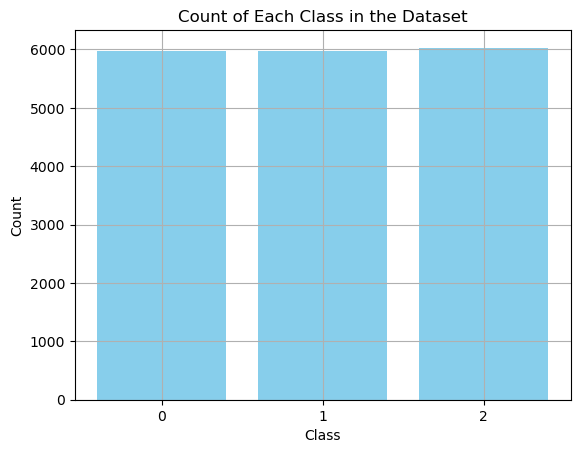

In [23]:
counter = Counter(final_labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.grid(True)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [24]:
class_0_flatten = []
class_1_flatten = []
class_2_flatten = []


for image in final_data[final_labels == 0]:
    class_0_flatten.append(image.flatten())

for image in final_data[final_labels == 1]:
    class_1_flatten.append(image.flatten())

for image in final_data[final_labels == 2]:
    class_2_flatten.append(image.flatten())


class_0_flatten = np.array(class_0_flatten, dtype='uint8')
class_1_flatten = np.array(class_1_flatten, dtype='uint8')
class_2_flatten = np.array(class_2_flatten, dtype='uint8')

class_0_flatten.shape, class_1_flatten.shape, class_2_flatten.shape, final_data.shape, final_labels.shape

((5972, 3600), (5968, 3600), (6030, 3600), (17970, 60, 60, 1), (17970,))

#**Flatten images**

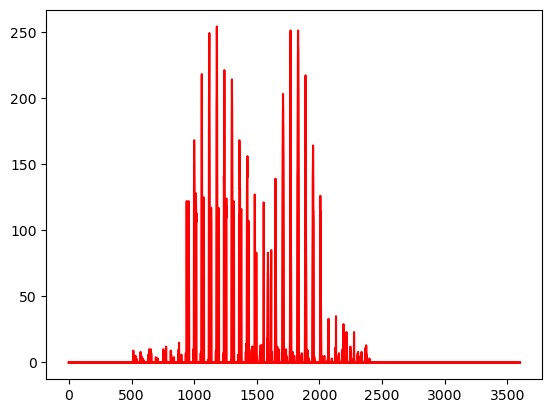

In [65]:
for i in range(5):
    plt.plot(class_0_flatten[i], color='red')

plt.show();

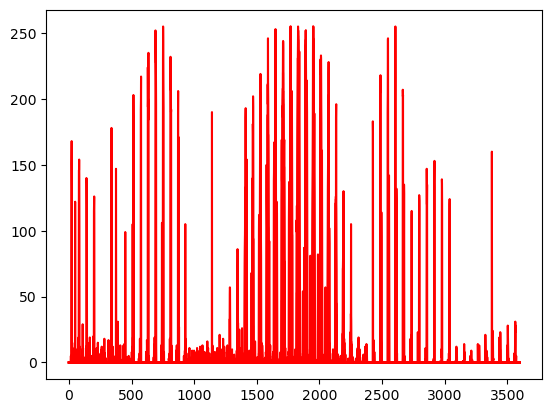

In [26]:
for i in range(10):
    plt.plot(class_1_flatten[i], color='red')

plt.show();

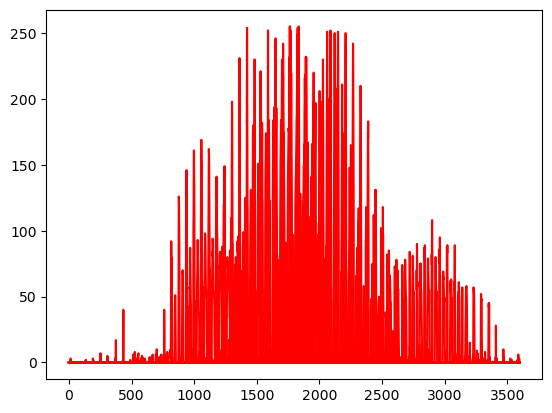

In [27]:
for i in range(10):
    plt.plot(class_2_flatten[i], color='red')
    
plt.show();

#**Pixels mean**

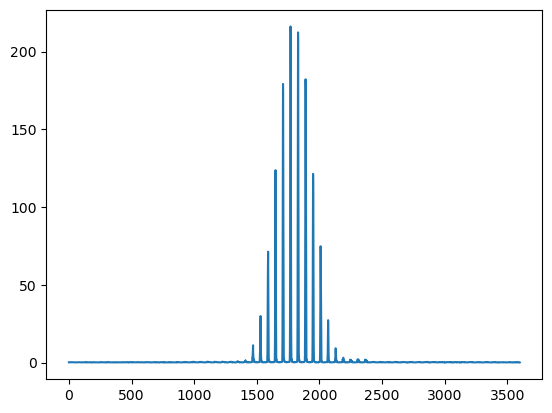

In [28]:
class_0_mean = np.mean(class_0_flatten, axis=0)

plt.plot(class_0_mean)
plt.show()

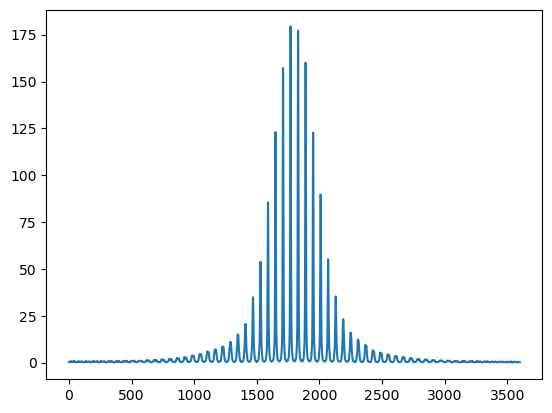

In [29]:
class_1_mean = np.mean(class_1_flatten, axis=0)

plt.plot(class_1_mean)
plt.show()

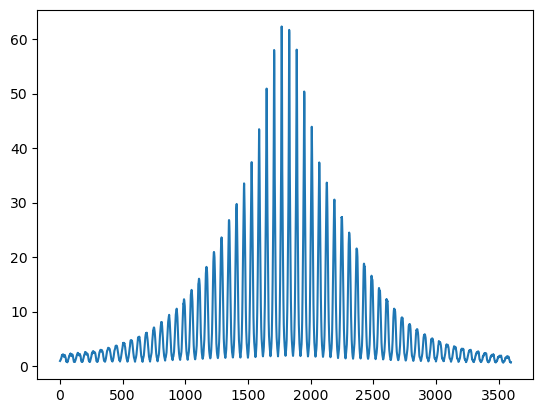

In [30]:
class_2_mean = np.mean(class_2_flatten, axis=0)

plt.plot(class_2_mean)
plt.show()

#**Pixels Correlation**

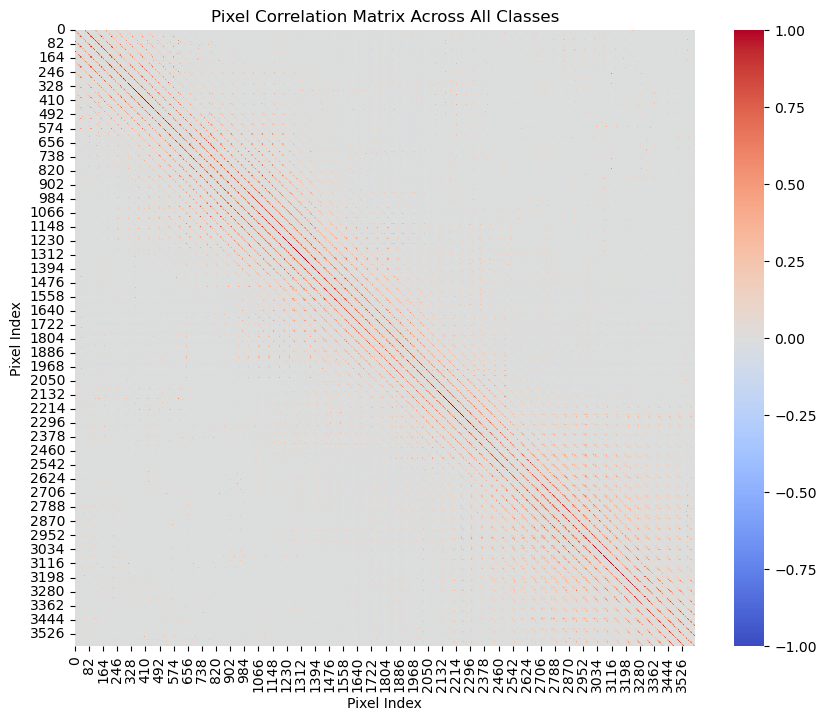

In [31]:
correlation_matrix = np.corrcoef(class_0_flatten, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pixel Correlation Matrix Across All Classes")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Index")
plt.show()

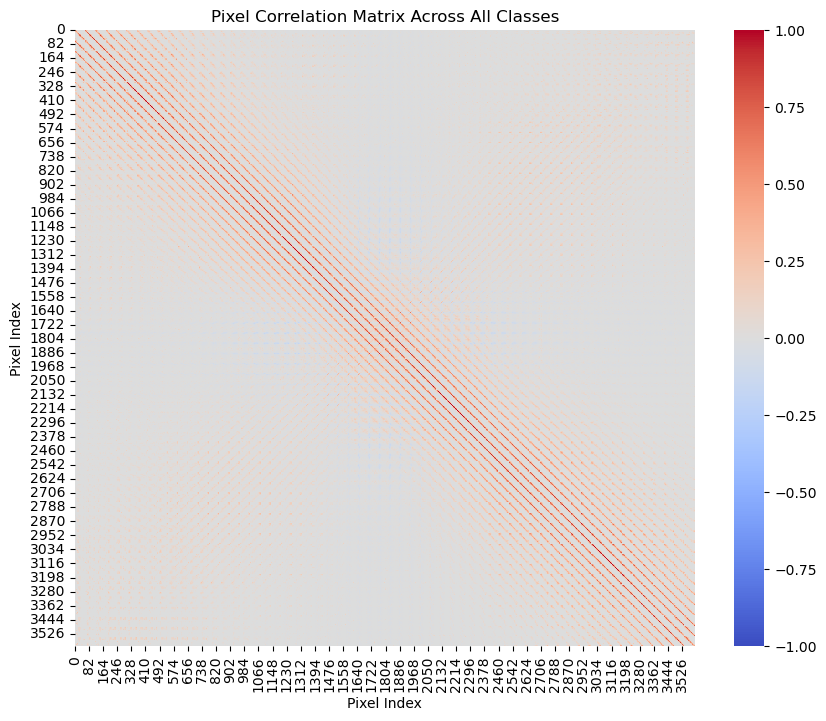

In [32]:
correlation_matrix = np.corrcoef(class_1_flatten, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pixel Correlation Matrix Across All Classes")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Index")
plt.show()

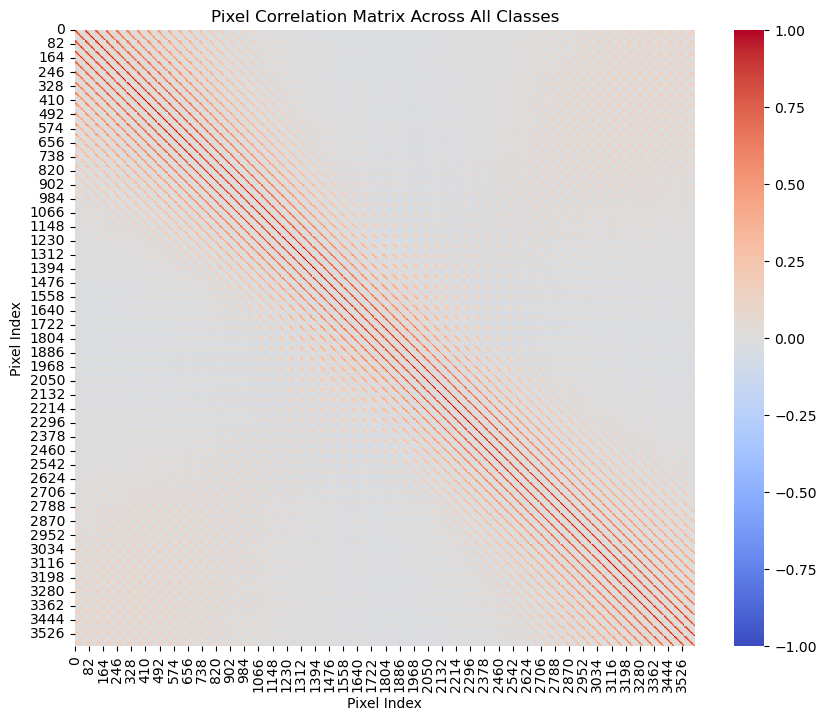

In [33]:
correlation_matrix = np.corrcoef(class_2_flatten, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pixel Correlation Matrix Across All Classes")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Index")
plt.show()

#**Sobel**

In [34]:
class_0_image = final_data[final_labels == 0]
class_1_image = final_data[final_labels == 1]
class_2_image = final_data[final_labels == 2]

In [35]:
class_0_image.shape, class_1_image.shape, class_2_image.shape

((5972, 60, 60, 1), (5968, 60, 60, 1), (6030, 60, 60, 1))

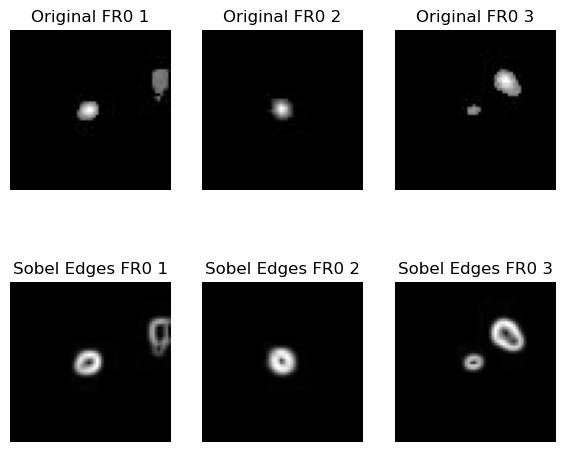

In [36]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
edge_image = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(12, 6))
for i in range(3):
    image = class_0_image[i]
    sobel_x = cv2.Sobel(class_0_image[i], cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(class_0_image[i], cv2.CV_64F, 0, 1, ksize=5)   
    edge_image = np.sqrt(sobel_x**2 + sobel_y**2)
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Original FR0 {i+1}")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(edge_image, cmap='gray')
    plt.title(f"Sobel Edges FR0 {i+1}")
    plt.axis('off')

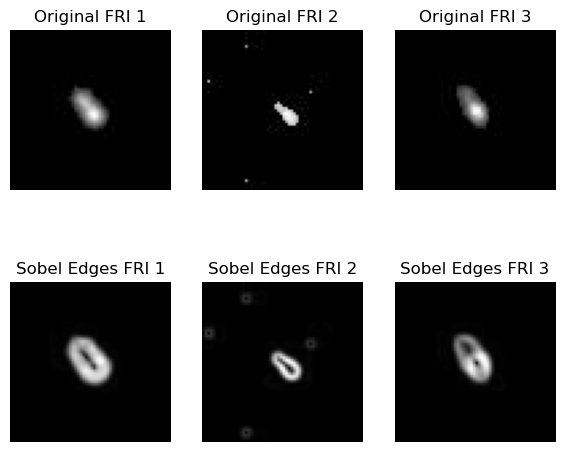

In [37]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
edge_image = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(12, 6))
for i in range(3):
    image = class_1_image[i]
    sobel_x = cv2.Sobel(class_1_image[i], cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(class_1_image[i], cv2.CV_64F, 0, 1, ksize=5)   
    edge_image = np.sqrt(sobel_x**2 + sobel_y**2)
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Original FRI {i+1}")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(edge_image, cmap='gray')
    plt.title(f"Sobel Edges FRI {i+1}")
    plt.axis('off')

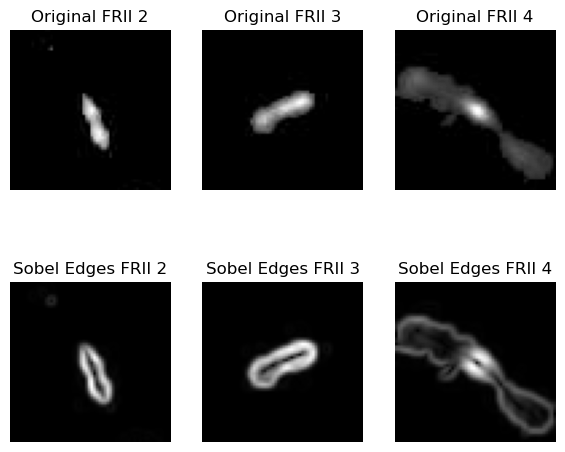

In [38]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
edge_image = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(12, 6))
for i in range(1, 4):
    image = class_2_image[i]
    sobel_x = cv2.Sobel(class_2_image[i], cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(class_2_image[i], cv2.CV_64F, 0, 1, ksize=5)   
    edge_image = np.sqrt(sobel_x**2 + sobel_y**2)
    plt.subplot(2, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Original FRII {i+1}")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(edge_image, cmap='gray')
    plt.title(f"Sobel Edges FRII {i+1}")
    plt.axis('off')

#**Symmetry**

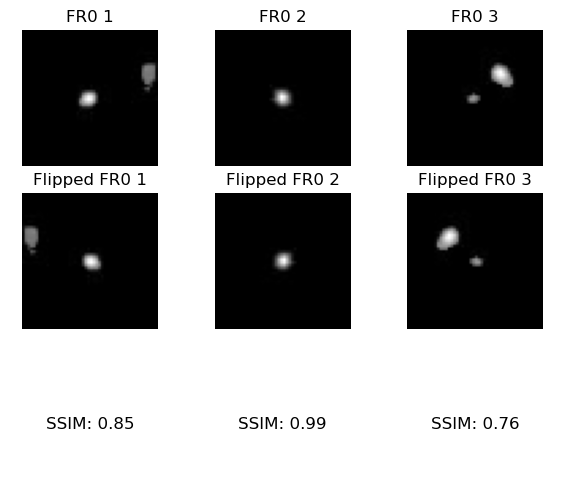

In [39]:
plt.figure(figsize=(12, 6))
for i in range(3):
    image = class_0_image[i]
    image = cv2.resize(image, (50, 50))  

    flipped_image = cv2.flip(image, 1)

    symmetry_score, _ = ssim(image, flipped_image, full=True)


    # Original Image
    plt.subplot(3, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"FR0 {i+1}")
    plt.axis('off')

    # Flipped Image
    flipped_image = cv2.flip(image, 1)
    plt.subplot(3, 5, i+6)
    plt.imshow(flipped_image, cmap='gray')
    plt.title(f"Flipped FR0 {i+1}")
    plt.axis('off')

    # Symmetry Score
    plt.subplot(3, 5, i+11)
    plt.text(0.5, 0.5, f"SSIM: {symmetry_score:.2f}", ha='center', va='center', fontsize=12)
    plt.axis('off')

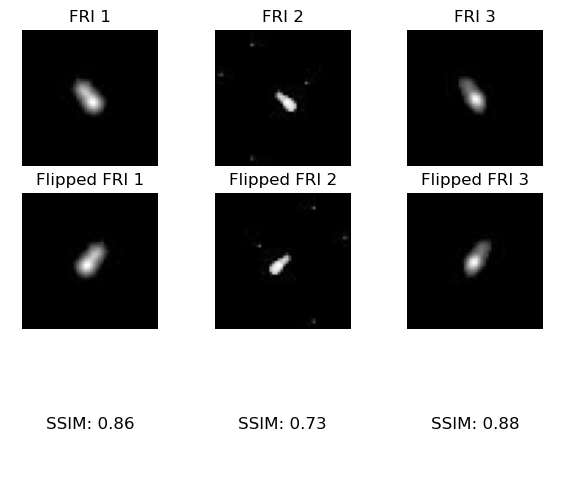

In [40]:
plt.figure(figsize=(12, 6))
for i in range(3):
    image = class_1_image[i]
    image = cv2.resize(image, (50, 50))  

    flipped_image = cv2.flip(image, 1)

    symmetry_score, _ = ssim(image, flipped_image, full=True)


    # Original Image
    plt.subplot(3, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"FRI {i+1}")
    plt.axis('off')

    # Flipped Image
    flipped_image = cv2.flip(image, 1)
    plt.subplot(3, 5, i+6)
    plt.imshow(flipped_image, cmap='gray')
    plt.title(f"Flipped FRI {i+1}")
    plt.axis('off')

    # Symmetry Score
    plt.subplot(3, 5, i+11)
    plt.text(0.5, 0.5, f"SSIM: {symmetry_score:.2f}", ha='center', va='center', fontsize=12)
    plt.axis('off')

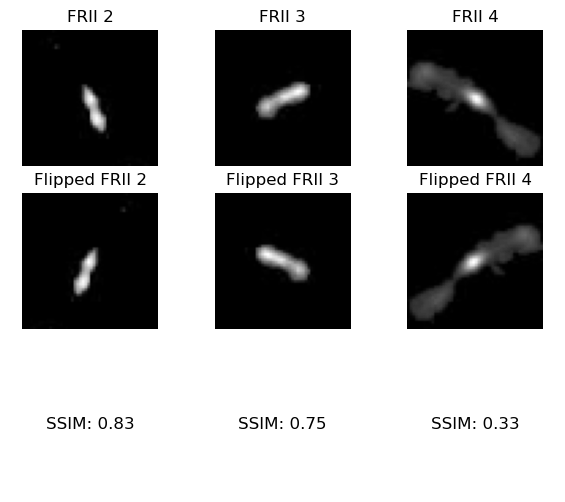

In [41]:
plt.figure(figsize=(12, 6))
for i in range(1, 4):
    image = class_2_image[i]
    image = cv2.resize(image, (50, 50))  

    flipped_image = cv2.flip(image, 1)

    symmetry_score, _ = ssim(image, flipped_image, full=True)


    # Original Image
    plt.subplot(3, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"FRII {i+1}")
    plt.axis('off')

    # Flipped Image
    flipped_image = cv2.flip(image, 1)
    plt.subplot(3, 5, i+6)
    plt.imshow(flipped_image, cmap='gray')
    plt.title(f"Flipped FRII {i+1}")
    plt.axis('off')

    # Symmetry Score
    plt.subplot(3, 5, i+11)
    plt.text(0.5, 0.5, f"SSIM: {symmetry_score:.2f}", ha='center', va='center', fontsize=12)
    plt.axis('off')

In [42]:
flipped_class_0_scores = []

for i in class_0_image:
    image = cv2.resize(i, (50, 50))  
    flipped_image = cv2.flip(image, 1)
    symmetry_score, _ = ssim(image, flipped_image, full=True)
    flipped_class_0_scores.append(symmetry_score)

flipped_class_0_scores = np.array(flipped_class_0_scores)
flipped_class_0_scores_mean = np.mean(flipped_class_0_scores)
flipped_class_0_scores.shape

(5972,)

In [43]:
flipped_class_1_scores = []

for i in class_1_image:
    image = cv2.resize(i, (50, 50))  
    flipped_image = cv2.flip(image, 1)
    symmetry_score, _ = ssim(image, flipped_image, full=True)
    flipped_class_1_scores.append(symmetry_score)

flipped_class_1_scores = np.array(flipped_class_1_scores)
flipped_class_1_scores_mean = np.mean(flipped_class_1_scores)
flipped_class_1_scores.shape

(5968,)

In [44]:
flipped_class_2_scores = []

for i in class_2_image:
    image = cv2.resize(i, (50, 50))  
    flipped_image = cv2.flip(image, 1)
    symmetry_score, _ = ssim(image, flipped_image, full=True)
    flipped_class_2_scores.append(symmetry_score)

flipped_class_2_scores = np.array(flipped_class_2_scores)
flipped_class_2_scores_mean = np.mean(flipped_class_2_scores)
flipped_class_2_scores.shape


(6030,)

In [45]:
print(f'FR0 numbers: {flipped_class_0_scores.shape} , FRI Numbers: {flipped_class_1_scores.shape}, FRII Numbers: {flipped_class_2_scores.shape}')
print(f'FR0 Symmetry Score: {flipped_class_0_scores_mean:0.2f} , FRI Symmetry Score: {flipped_class_1_scores_mean:0.2f}, FRII Symmetry Score: {flipped_class_2_scores_mean:0.2f}')

FR0 numbers: (5972,) , FRI Numbers: (5968,), FRII Numbers: (6030,)
FR0 Symmetry Score: 0.95 , FRI Symmetry Score: 0.82, FRII Symmetry Score: 0.70


#**Preprocessing**

In [46]:
np.min(final_data[0]), np.max(final_data[0])

(0, 251)

In [47]:
data_normalized = final_data / 255

In [48]:
print(f'Min of original = {np.min(final_data[0])}')
print(f'Max of original = {np.max(final_data[0])}')
print(f'Min of original = {np.min(data_normalized[0])}')
print(f'Max of original = {np.max(data_normalized[0])}')

Min of original = 0
Max of original = 251
Min of original = 0.0
Max of original = 0.984313725490196


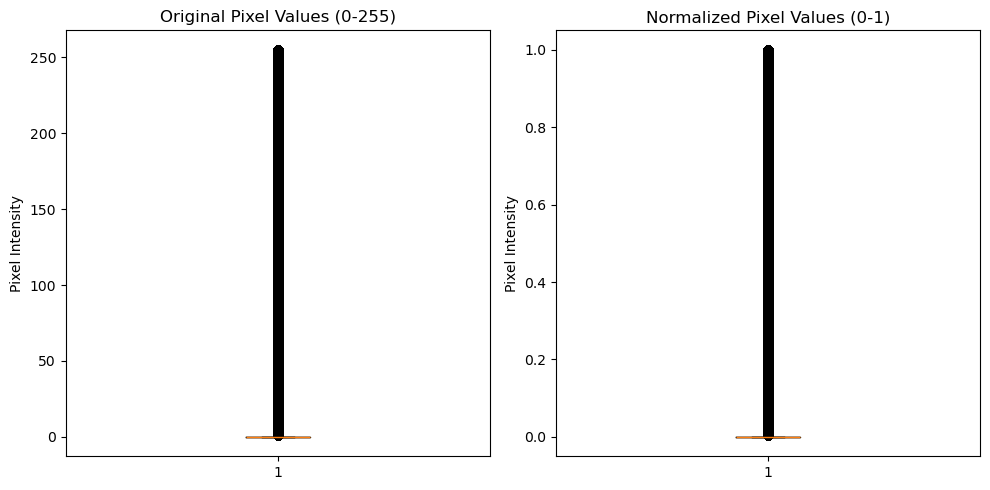

In [49]:
cropped_flat = final_data.flatten()
normalized_flat = data_normalized.flatten()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(cropped_flat)
plt.title("Original Pixel Values (0-255)")
plt.ylabel("Pixel Intensity")

plt.subplot(1, 2, 2)
plt.boxplot(normalized_flat)
plt.title("Normalized Pixel Values (0-1)")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()

#**Splitting**

In [50]:
x = data_normalized
y = final_labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((12579, 60, 60, 1), (12579,), (5391, 60, 60, 1), (5391,))

#**CNN**

In [51]:
model_cnn = keras.Sequential()

#CNN
model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(60, 60, 1)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))
model_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


#Dense
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units=256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(units=256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=256, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))


#Output
model_cnn.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))


#Model Compiling
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = [keras.metrics.CategoricalAccuracy()]

model_cnn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


#Builing and Summury
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 58, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 58, 58, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 64)        0

In [52]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [53]:
start = time.perf_counter()
hist = model_cnn.fit(x_train, y_train, batch_size=512, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping])
end = time.perf_counter()

2024-10-31 11:35:13.702292: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-10-31 11:35:13.707764: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/100


2024-10-31 11:35:14.297223: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-10-31 11:35:14.668880: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-10-31 11:35:15.946781: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2024-10-31 11:35:16.050247: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


25/25 [==============================] - 35s 902ms/step - loss: 1.2860 - accuracy: 0.3321 - val_loss: 1.0987 - val_accuracy: 0.3283
Epoch 2/100
25/25 [==============================] - 7s 292ms/step - loss: 1.2034 - accuracy: 0.3409 - val_loss: 1.0987 - val_accuracy: 0.3741
Epoch 3/100
25/25 [==============================] - 7s 291ms/step - loss: 1.1666 - accuracy: 0.3391 - val_loss: 1.0988 - val_accuracy: 0.3415
Epoch 4/100
25/25 [==============================] - 7s 290ms/step - loss: 1.1543 - accuracy: 0.3317 - val_loss: 1.0988 - val_accuracy: 0.3591
Epoch 5/100
25/25 [==============================] - 7s 290ms/step - loss: 1.1267 - accuracy: 0.3545 - val_loss: 1.0988 - val_accuracy: 0.3302
Epoch 6/100
25/25 [==============================] - 7s 289ms/step - loss: 1.1096 - accuracy: 0.3639 - val_loss: 1.0989 - val_accuracy: 0.3302
Epoch 7/100
25/25 [==============================] - 7s 289ms/step - loss: 1.1078 - accuracy: 0.3622 - val_loss: 1.0991 - val_accuracy: 0.3302
Epoch 8/10

In [54]:
(end - start)/ 60

12.53628020495

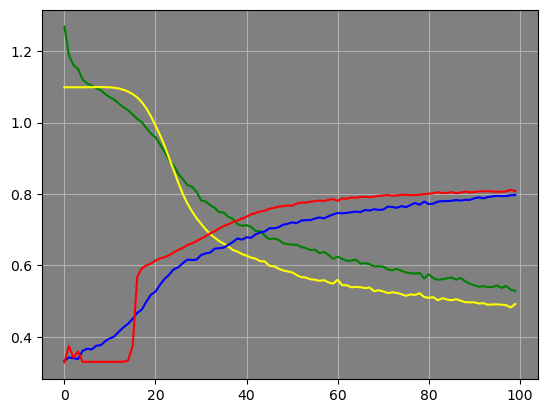

In [55]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_test = hist.history['val_loss']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(loss_train, color='green', label='Train loss')
plt.plot(loss_test, color='yellow', label='Test loss')
plt.plot(acc_train, color='blue', label='Train acc')
plt.plot(acc_test, color='red', label='Test acc')


plt.show()

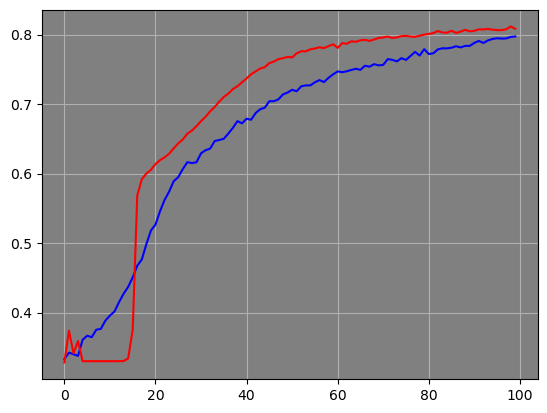

In [56]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(acc_train, color='blue', label='Train acc');
plt.plot(acc_test, color='red', label='Test acc');


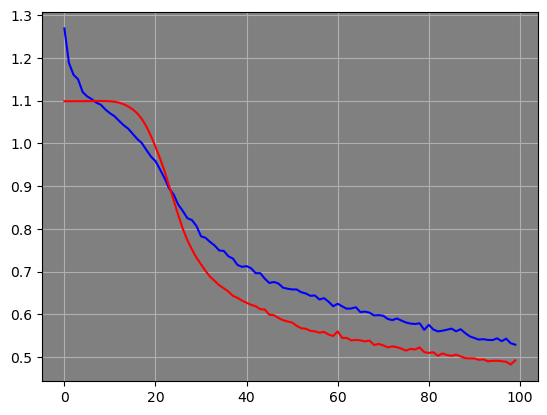

In [57]:
loss_train = hist.history['loss']
loss_test = hist.history['val_loss']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(loss_train, color='blue', label='Train loss');
plt.plot(loss_test, color='red', label='Test loss');



In [58]:
model_cnn.evaluate(x=x_test, y=y_test)
model_cnn.evaluate(x=x_train, y=y_train)

394/394 [==============================] - 7s 19ms/step - loss: 0.4676 - accuracy: 0.8218


[0.4676147997379303, 0.8218459486961365]

In [59]:
y_pred_train = model_cnn.predict(x_train)
y_pred_test = model_cnn.predict(x_test)


index_train = random.randint(0, 12579)
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train[index_train]}')

index_test = random.randint(0, 5391)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test[index_test]}')


y_train: 2 y_pred_train:[0.04785398 0.7717838  0.18036225]
y_test: 1 y_pred_test:[0.02979817 0.9344734  0.03572839]


In [60]:
y_pred_train_smax = softmax(y_pred_train, axis=1)
y_pred_test_smax = softmax(y_pred_test, axis=1)

y_pred_train_smax = np.argmax(y_pred_train_smax, axis=1)
y_pred_test_smax = np.argmax(y_pred_test_smax, axis=1)


y_pred_test_smax.shape, y_pred_train_smax.shape

((5391,), (12579,))

In [61]:
acc_train = accuracy_score(y_train, y_pred_train_smax)
acc_test = accuracy_score(y_test, y_pred_test_smax)

p = precision_score(y_test, y_pred_test_smax, average='micro')
r = recall_score(y_test, y_pred_test_smax, average='micro')


print(f'Acc Train: {acc_train} - Acc Test: {acc_test} - Percision: {p} - Recall: {r}')

Acc Train: 0.8218459336990221 - Acc Test: 0.808198849935077 - Percision: 0.808198849935077 - Recall: 0.808198849935077


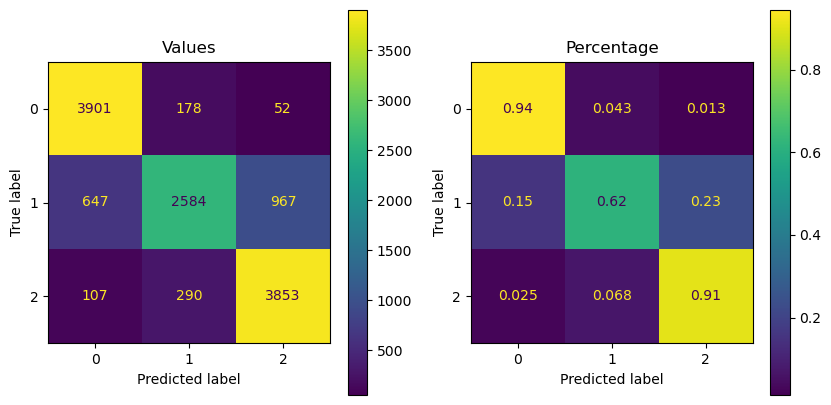

In [63]:
cm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_smax)
disp_cm_train = ConfusionMatrixDisplay(cm_train)

cm_train = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
disp_cm_train_perce = ConfusionMatrixDisplay(cm_train)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_train.plot(ax=ax1);
disp_cm_train_perce.plot(ax=ax2);

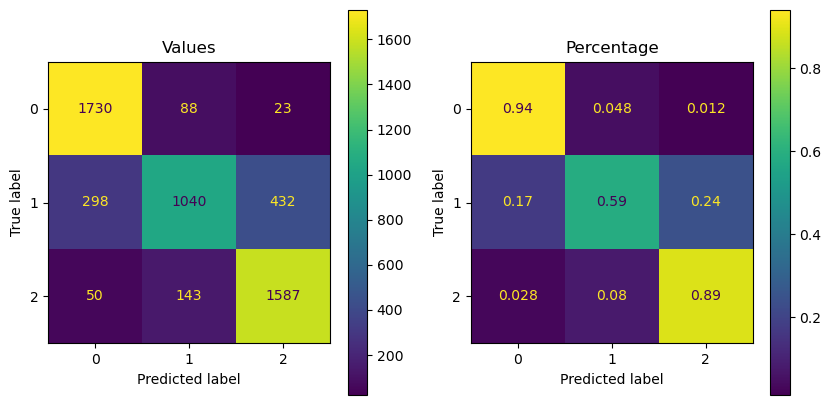

In [64]:
cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_smax)
disp_cm_test = ConfusionMatrixDisplay(cm_test)

cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
disp_cm_test_perce = ConfusionMatrixDisplay(cm_test)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_test.plot(ax=ax1);
disp_cm_test_perce.plot(ax=ax2);